

1.  Clustering Algorithms

  >K-Means clustering,

  >Hierarchical Clustering,
  
 > DBSCAN
2.  Dimensional Reduction Algorithms
  >PCA
3.  Association Rules Learning

  >Aprior Algo



#K-Means clustering  algorithms

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


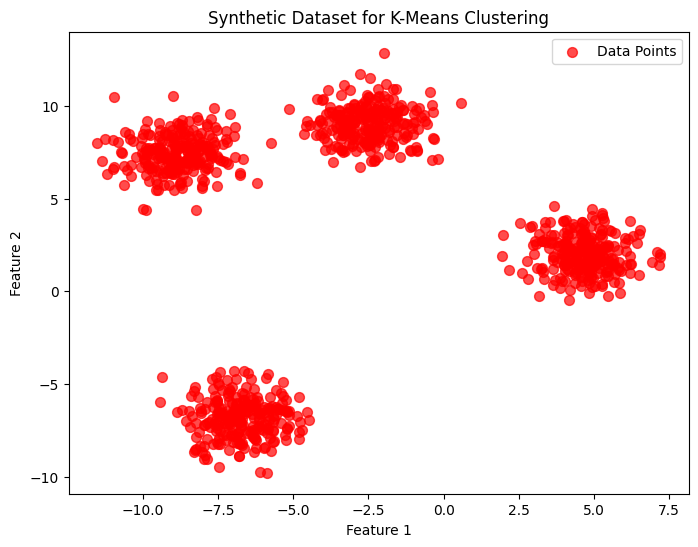

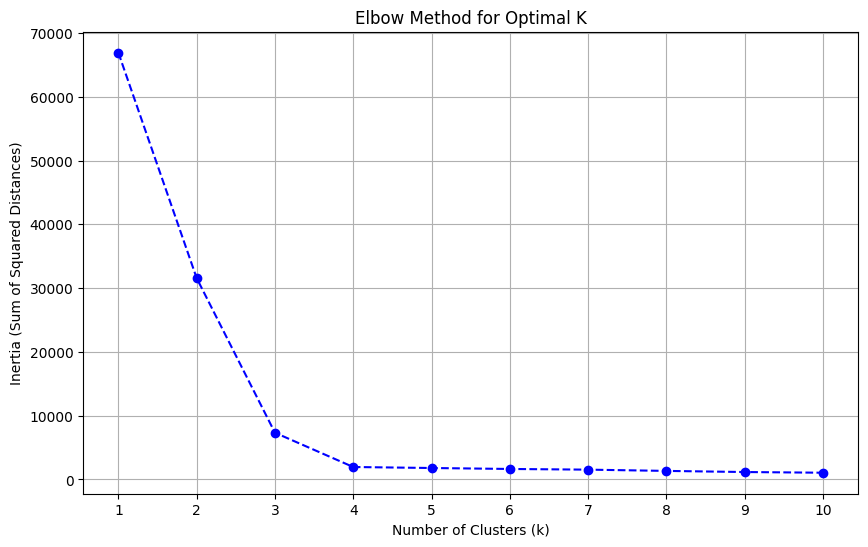

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='red', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10 ,6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()

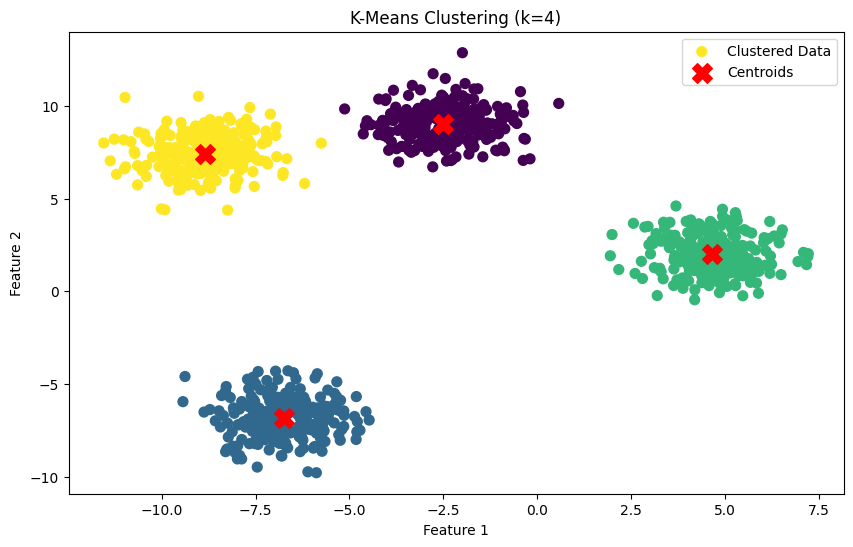

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(10 ,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#What is Hierarchical Clustering

hierarchical clustering allows to builds tree structure from data similarities.

Bottom up approches is used in aggiomerative clustering or AGNES

#What is Dendogram?.
is a type of treee diagram showing hierarchical relationships betwen different
of data.

Dendogram containd the memory of hierarchical clustering algorithms

#Ward Method

the Ward method , is hierarchical method



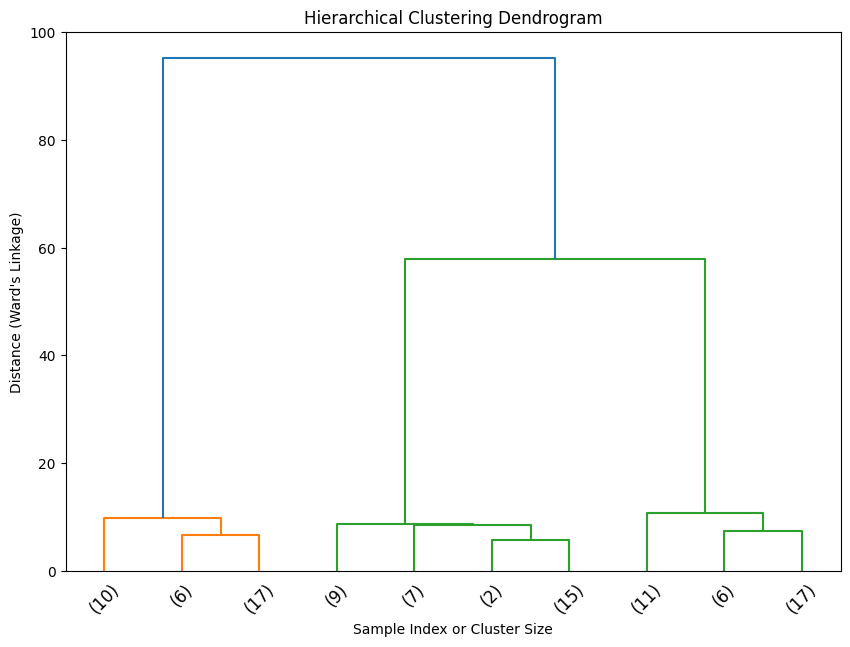

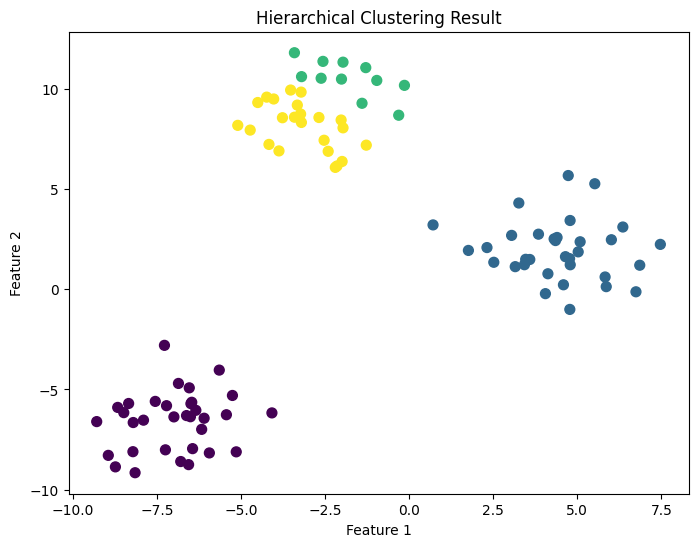

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()

# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 10
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


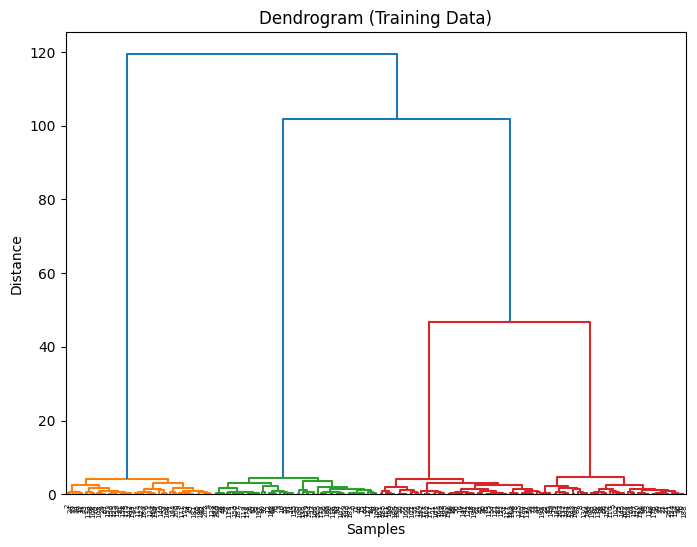

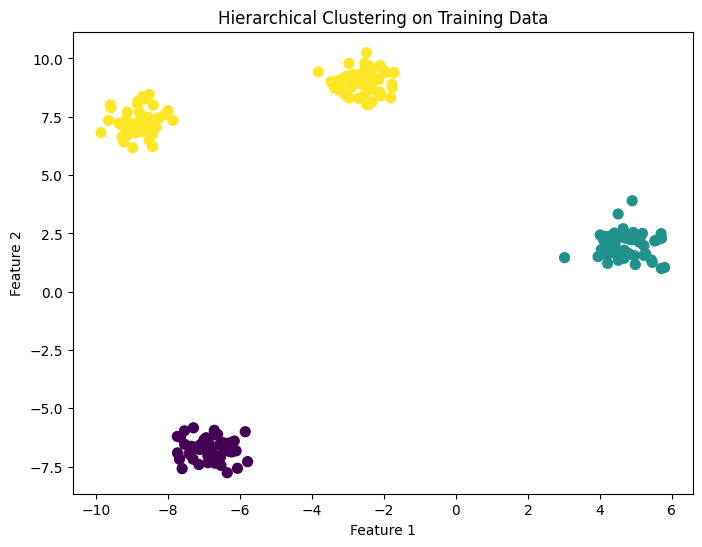

Silhouette Score for Training Data: 0.81


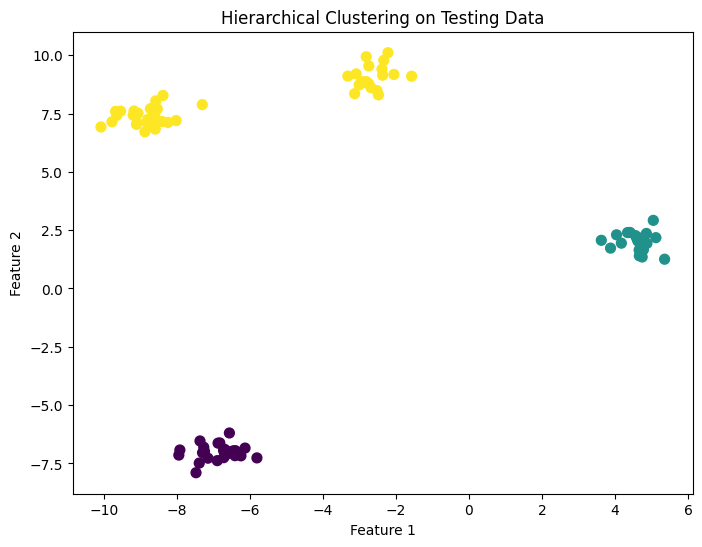

Silhouette Score for Testing Data: 0.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")


# * DBSCAN Density based clustering method

Two important user defined Parameters
# 1 .Epsilon €

# 2 .MinPts

**Type of Points**

1.Core Point

2.Boundary Point

3.Noise



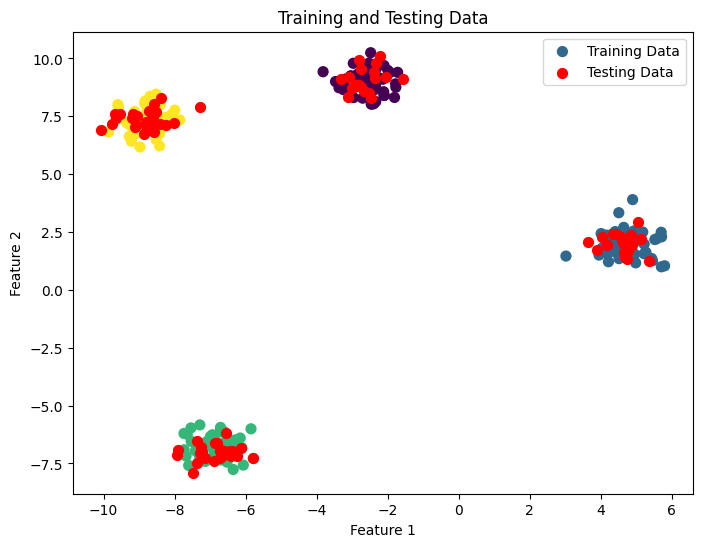

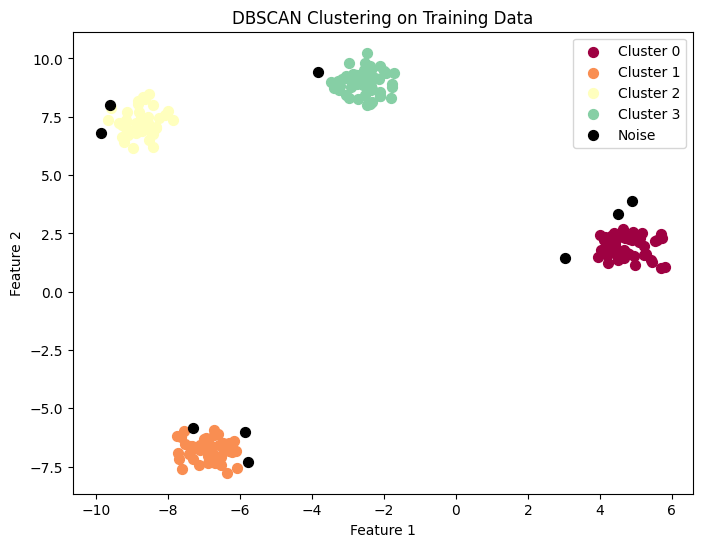

Silhouette Score for Training Data: 0.90


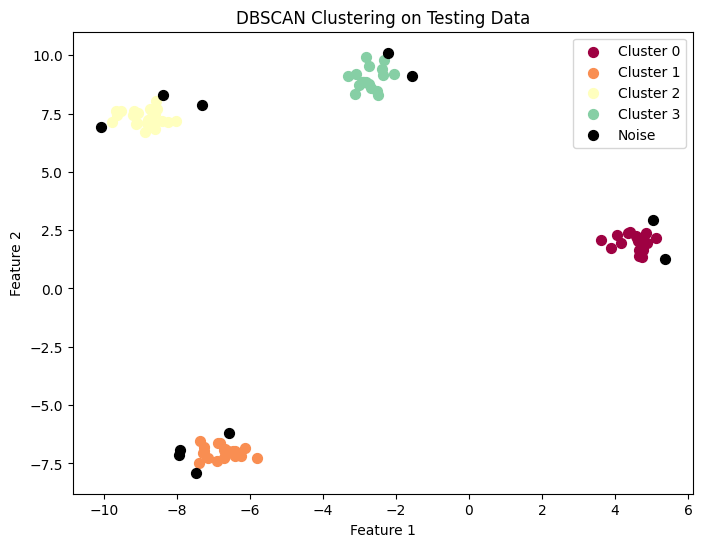

Silhouette Score for Testing Data: 0.92


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=50, label="Testing Data")
plt.title("Training and Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Apply DBSCAN on the training data
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps: neighborhood size, min_samples: minimum points in a cluster
train_labels = dbscan.fit_predict(X_train)

# Plot DBSCAN clustering results for training data
plt.figure(figsize=(8, 6))
unique_labels = set(train_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (train_labels == k)
    xy = X_train[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on training data
core_samples_mask = (train_labels != -1)
if len(set(train_labels[core_samples_mask])) > 1:  # At least two clusters are required for silhouette score
    score = silhouette_score(X_train[core_samples_mask], train_labels[core_samples_mask])
    print(f"Silhouette Score for Training Data: {score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

# Predict clusters for the testing data
test_labels = dbscan.fit_predict(X_test)

# Plot DBSCAN clustering results for testing data
plt.figure(figsize=(8, 6))
unique_labels_test = set(test_labels)
colors_test = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_test))]

for k, col in zip(unique_labels_test, colors_test):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (test_labels == k)
    xy = X_test[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on testing data
core_samples_mask_test = (test_labels != -1)
if len(set(test_labels[core_samples_mask_test])) > 1:
    test_score = silhouette_score(X_test[core_samples_mask_test], test_labels[core_samples_mask_test])
    print(f"Silhouette Score for Testing Data: {test_score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")


# * Dimensional Reduction Algorithms

PCA : Principal component Analysis is a dimensionality reduction technique
used to transform a dataset with many variable into a smaller set of uncorrelated variables called principal Component ,while retaining as much variance as possible

>it is commonly used in Data preprocessing and exploratory data analysis

**How PCA Works**

1:Standardization

2:Covatiance Matrix Computation

3:Eigenvalue and Eigenvecteor Computation

4:Choose Principal Components

5:Transform Data


Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


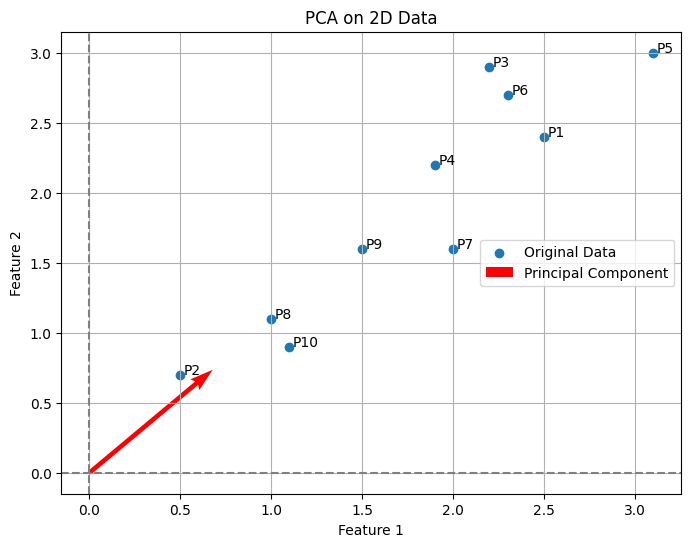

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2


#Apriori Algorithms
    The algorithm is a classic algorithm in data mining ,used for association rules learing .it determines frequent itemsets in a dataset and generates association rules that help understand relationship between different items

1:Association Rules Learning
  
    Finds interesting relationship among item in a dataset

    A rules expressed as X=> Y meaning "if X ,then Y"

2: Frequent Itemsets

    An itemset is considered frequent if it occurs in the dataset more than a predefined

3: Measures  support

        Support(X)=

        Confidence(Y)=

 4:       


Apriori Algorithm


Dataset (Binary Encoding):
    Bread  Butter   Eggs    Jam   Milk
0   True    True  False  False   True
1   True    True  False   True  False
2   True   False   True  False   True
3   True    True   True  False   True
4   True   False   True  False  False

Frequent Itemsets:
    support         itemsets
0      1.0          (Bread)
1      0.6         (Butter)
2      0.6           (Eggs)
3      0.6           (Milk)
4      0.6  (Bread, Butter)
5      0.6    (Bread, Eggs)
6      0.6    (Bread, Milk)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)    (Butter)                 1.0                 0.6      0.6   
1    (Butter)     (Bread)                 0.6                 1.0      0.6   
2     (Bread)      (Eggs)                 1.0                 0.6      0.6   
3      (Eggs)     (Bread)                 0.6                 1.0      0.6   
4     (Bread)      (Milk)                 1.0                 0.6      0.6   
5      (Mi

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


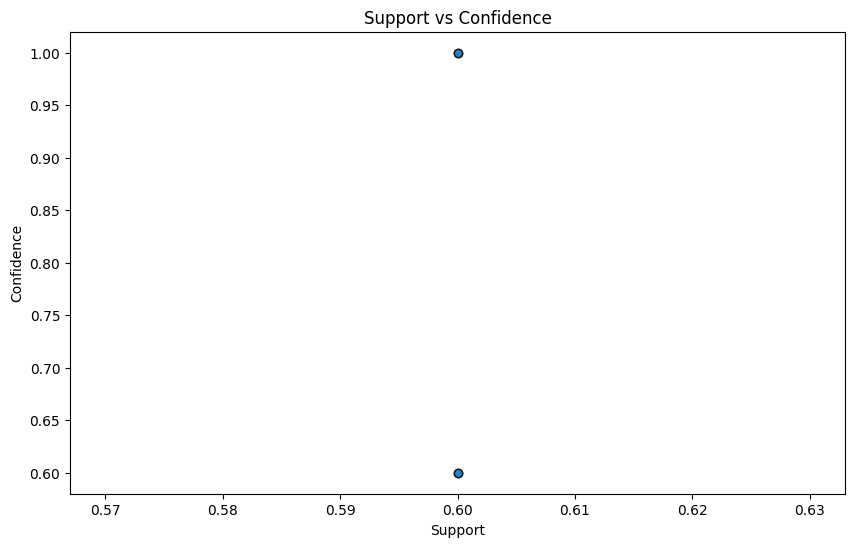

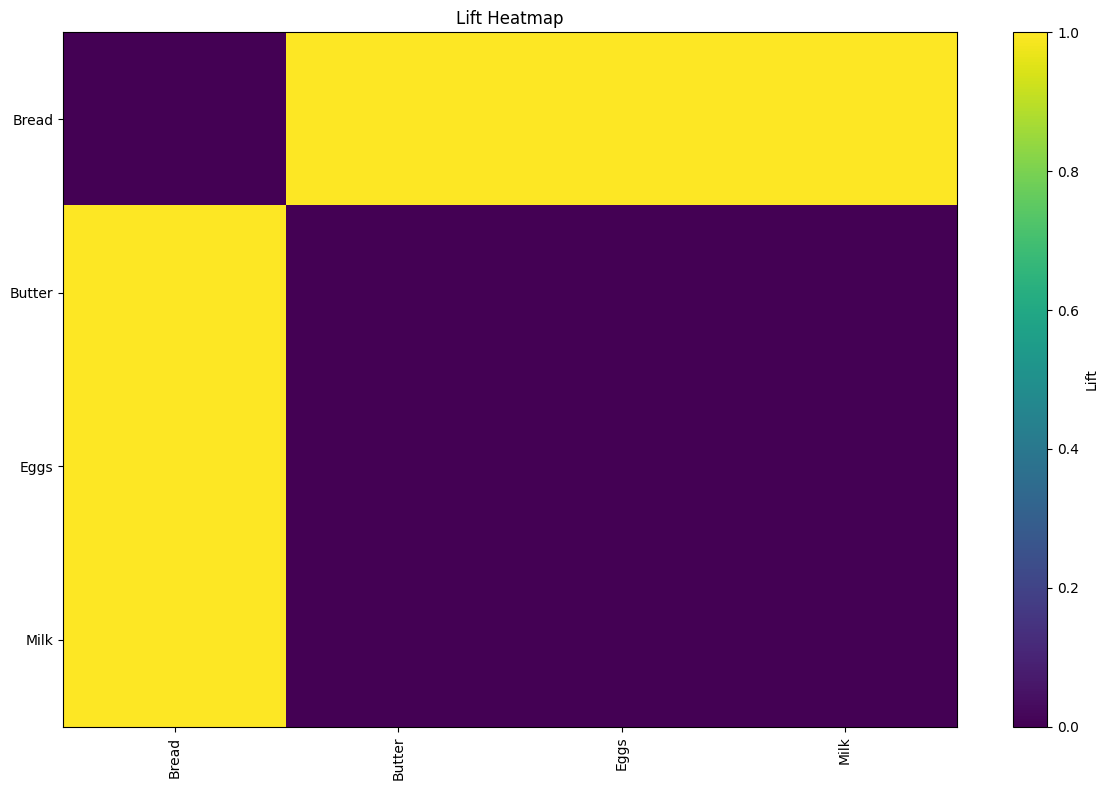

<Figure size 1000x600 with 0 Axes>

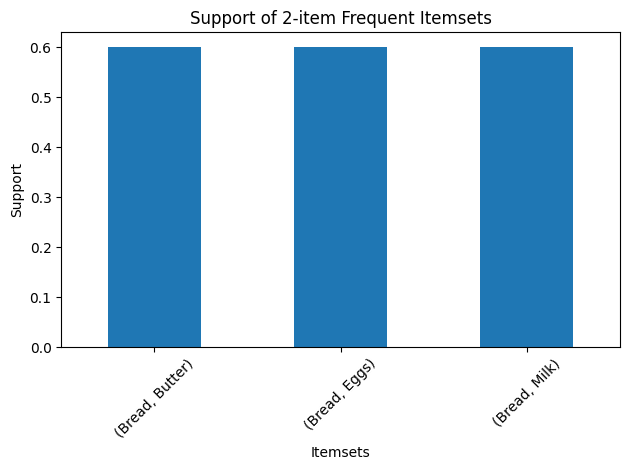

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset: List of transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter', 'Eggs', 'Bread'],
    ['Bread', 'Eggs']
]

# Convert transactions into a DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset (Binary Encoding):\n", df)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=5)
print("\nAssociation Rules:\n", rules)

# Plot the support vs confidence for rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Plot heatmap of lift
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()

# Plot bar chart for frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
plt.figure(figsize=(10, 6))
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Support of 2-item Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Sample:
   cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                     

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Association Rules:
         antecedents                     consequents  antecedent support  \
0               (c)                             (b)            0.855244   
1               (b)                             (c)            0.947070   
2               (d)                             (b)            0.387494   
3               (e)                             (b)            0.964549   
4               (b)                             (e)            0.947070   
...             ...                             ...                 ...   
1114939   (c, s, k)     (y, b, e, o, n, t, f, w, p)            0.371000   
1114940   (t, o, k)     (y, s, b, e, n, f, c, p, w)            0.413836   
1114941   (c, t, k)     (y, s, b, e, o, n, f, w, p)            0.363122   
1114942      (y, k)  (s, b, e, o, n, t, f, c, p, w)            0.409527   
1114943      (t, y)  (s, k, b, e, o, n, f, c, p, w)            0.415559   

         consequent support   support  confidence      lift  representativity 

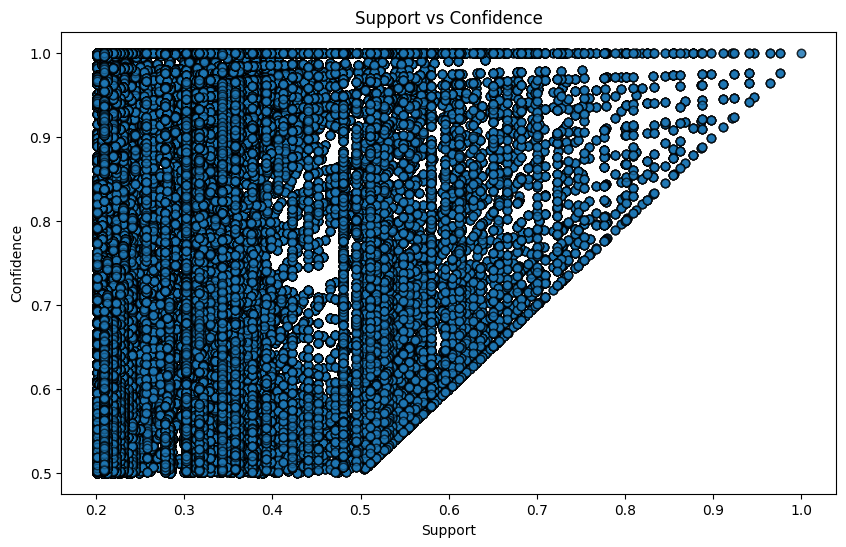

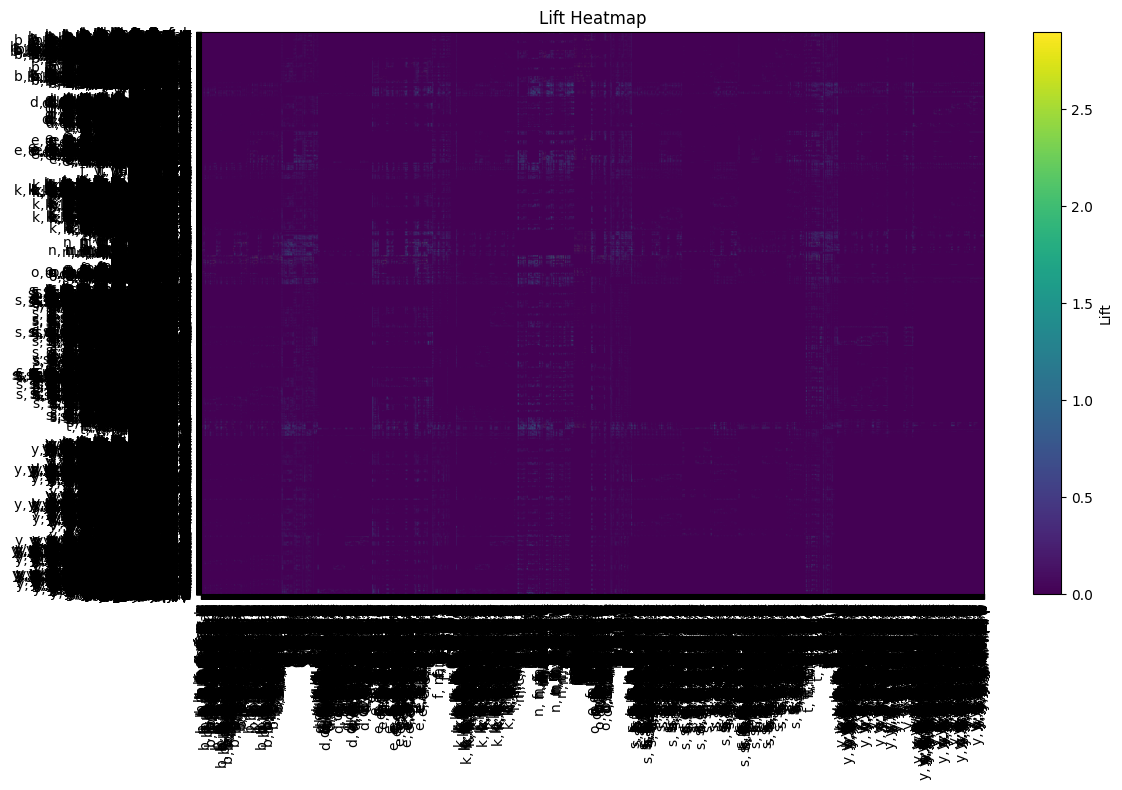

In [ ]:
from sklearn.datasets import fetch_openml
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load Mushroom dataset from sklearn
mushroom_data = fetch_openml(name='mushroom', version=1, as_frame=True)
df = mushroom_data.frame

# Display basic info
print("Dataset Sample:\n", df.head())
print("Shape of the dataset:", df.shape)

# Convert to transactional format
transactions = df.astype(str).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm
min_support = 0.2  # 20% minimum support
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.5  # 50% minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=1)
print("\nAssociation Rules:\n", rules)

# Visualize support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Visualize lift with a heatmap
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()
